# Battle of the Neighbourhoods
## IBM Applied Data Science Capstone
### Brittany Easton

### Table of Contents
- [Business Problem](#BusinessProblem)
- [Data](#Data)
    - [Cleaning](#Cleaning)
    - [Exploration](#Exploration)
    - [Foursquare](#Foursquare)
- [Methodology](#Methodology)
- [Results & Discussion](#Results-&-Discussion)
- [Conclusion](#Conclusion)

### Business Problem

#### The client is a black belt in Brazilian Jiujitsu, and is looking to open up her own martial arts studio in the Toronto. She has asked for a recommendation on where to start her business. 
#### The client asks that the criteria for the recommendation be based on the following priorities:
#### - First and foremost, she is focused on quickly creating a profitable business. Therefore the region she selects should have lower competition to allow for faster growth. The area she selects to start her business needs to have a smaller ratio of studios relative to the number of people so that she can easily compete as a newcomer.
#### - She is interested in starting her business in an area where she can make a big impact and have the greatest opportunity to grow a large membership base. An area with a higher population and a higher density will mean the business is closer and accessible to more people. 
#### - Since doing martial arts can be an expensive hobby, she would like to make sure that the region where she sets up her business is an affluent one. A region where more households are making more than 100000 dollars mean that the people who live there can more easily afford Brazilian Jiujitsu for the whole family.


### Data

#### Cleaning

In [1]:
import pandas as pd
import numpy as np
!pip install lxml html5lib beautifulsoup4
print("Libraries installed")

Libraries installed


In [2]:
# Read the Canada Revenue Agency CSV into a dataframe
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_4162aa0ce9d14f8eaf8861b9f5b37382 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='v-yAB5yrE8ZtUzPsAovSWvIkqNnUEj1uRUqihxknwcM8',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_4162aa0ce9d14f8eaf8861b9f5b37382.get_object(Bucket='courseracaptsoneprojectibmdatasci-donotdelete-pr-uks8dynee6quum',Key='Canada Revenue Agency Income by FSA.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

cra = pd.read_csv(body)
cra.head()


,Prov/Terr,FSA,Total,Total Income,"Under $5,000","$5,000 to $9,999","$10,000 to $14,999","$15,000 to $19,999","$20,000 to $24,999","$25,000 to $29,999",...,"$45,000 to $49,999","$50,000 to $54,999","$55,000 to $59,999","$60,000 to $69,999","$70,000 to $79,999","$80,000 to $89,999","$90,000 to $99,999","$100,000 to $149,999","$150,000 to $249,999","$250,000 and over"
0,10,A0A,40120,1.637100e+09,2900,2540,3850,5060,3450,2760,...,1770,1400,1220,1870,1470,1160,970,1900,760,140
1,10,A0B,17770,6.916760e+08,1130,1050,1730,2520,1710,1340,...,780,580,500,790,550,430,360,830,260,50
2,10,A0C,11080,3.738910e+08,730,650,1200,1760,1170,910,...,500,320,300,400,260,190,150,300,90,10
3,10,A0E,19590,7.572840e+08,1450,1290,2090,2750,2020,1410,...,770,570,510,790,610,470,460,950,380,40
4,10,A0G,31180,1.081975e+09,2310,1850,3660,4810,3030,2420,...,1280,980,770,1150,780,640,480,960,330,60


In [3]:
cra.shape

(1655, 23)

In [4]:
# Determine which number is assigned to the Province of Ontario using a known Ontario FSA "M2J"
cra.loc[cra['FSA'] == 'M2J']


,Prov/Terr,FSA,Total,Total Income,"Under $5,000","$5,000 to $9,999","$10,000 to $14,999","$15,000 to $19,999","$20,000 to $24,999","$25,000 to $29,999",...,"$45,000 to $49,999","$50,000 to $54,999","$55,000 to $59,999","$60,000 to $69,999","$70,000 to $79,999","$80,000 to $89,999","$90,000 to $99,999","$100,000 to $149,999","$150,000 to $249,999","$250,000 and over"
917,35,M2J,49360,1.966618e+09,8910,3470,4380,4500,3310,2620,...,1830,1630,1410,2320,1980,1500,1280,2420,770,340


In [5]:
# Drop all rows that are not in the Province of Ontario
cra = cra.loc[cra['Prov/Terr'] == '35']
cra.reset_index(drop=True, inplace=True)
cra.shape


(524, 23)

In [6]:
# Let's clean the CRA dataframe by dropping Total Income and Prov/Terr
cra.drop(['Total Income','Prov/Terr','Total'], axis=1, inplace=True)
cra.head()

,FSA,"Under $5,000","$5,000 to $9,999","$10,000 to $14,999","$15,000 to $19,999","$20,000 to $24,999","$25,000 to $29,999","$30,000 to $34,999","$35,000 to $39,999","$40,000 to $44,999","$45,000 to $49,999","$50,000 to $54,999","$55,000 to $59,999","$60,000 to $69,999","$70,000 to $79,999","$80,000 to $89,999","$90,000 to $99,999","$100,000 to $149,999","$150,000 to $249,999","$250,000 and over"
0,K0A,4480,3280,4920,5340,4790,3750,3900,4220,4350,4720,3740,3680,6670,5690,4440,4090,7730,2340,770
1,K0B,1030,790,1480,1860,1450,1020,1000,1070,1050,990,770,650,1160,800,590,470,750,250,90
2,K0C,2760,1980,3380,3880,3550,2620,2480,2720,2550,2340,1910,1700,2960,2180,1420,1320,2040,610,270
3,K0E,2010,1610,2560,2810,2660,2030,1950,2040,1880,1860,1440,1330,2070,1530,1070,880,1370,370,160
4,K0G,1960,1400,2140,2350,2130,1640,1630,1790,1680,1790,1410,1320,2230,1760,1340,1120,2090,620,200


In [7]:
# We'll also sum the data for household income into two categories: under $100,000 and over $100,000
# Then we'll create a ratio of affluent households for each FSA

craunder100 = cra.iloc[:,1:17]
craover100 = cra.iloc[:,17:21]
cra['Households Making Under $100,000'] = craunder100.sum(axis=1)
cra['Households Making Over $100,000'] = craover100.sum(axis=1)
cra.head()

,FSA,"Under $5,000","$5,000 to $9,999","$10,000 to $14,999","$15,000 to $19,999","$20,000 to $24,999","$25,000 to $29,999","$30,000 to $34,999","$35,000 to $39,999","$40,000 to $44,999",...,"$55,000 to $59,999","$60,000 to $69,999","$70,000 to $79,999","$80,000 to $89,999","$90,000 to $99,999","$100,000 to $149,999","$150,000 to $249,999","$250,000 and over","Households Making Under $100,000","Households Making Over $100,000"
0,K0A,4480,3280,4920,5340,4790,3750,3900,4220,4350,...,3680,6670,5690,4440,4090,7730,2340,770,72060,10840
1,K0B,1030,790,1480,1860,1450,1020,1000,1070,1050,...,650,1160,800,590,470,750,250,90,16180,1090
2,K0C,2760,1980,3380,3880,3550,2620,2480,2720,2550,...,1700,2960,2180,1420,1320,2040,610,270,39750,2920
3,K0E,2010,1610,2560,2810,2660,2030,1950,2040,1880,...,1330,2070,1530,1070,880,1370,370,160,29730,1900
4,K0G,1960,1400,2140,2350,2130,1640,1630,1790,1680,...,1320,2230,1760,1340,1120,2090,620,200,27690,2910


In [8]:
# Now let's drop the extra columns
cra.drop(cra.iloc[:,1:20], axis=1, inplace=True)
cra.head()

,FSA,"Households Making Under $100,000","Households Making Over $100,000"
0,K0A,72060,10840
1,K0B,16180,1090
2,K0C,39750,2920
3,K0E,29730,1900
4,K0G,27690,2910


In [9]:
# Create a new column to total the number of households in the FSA
cra['Total Households'] = cra.iloc[:,1:3].sum(axis=1)
cra.head()

,FSA,"Households Making Under $100,000","Households Making Over $100,000",Total Households
0,K0A,72060,10840,82900
1,K0B,16180,1090,17270
2,K0C,39750,2920,42670
3,K0E,29730,1900,31630
4,K0G,27690,2910,30600


In [10]:
# Create a new column to score the FSA on relative number of affluent households
cra['Affluence Ratio'] = cra.iloc[:,2]/cra.iloc[:,3]
cra.head()

,FSA,"Households Making Under $100,000","Households Making Over $100,000",Total Households,Affluence Ratio
0,K0A,72060,10840,82900,0.130760
1,K0B,16180,1090,17270,0.063115
2,K0C,39750,2920,42670,0.068432
3,K0E,29730,1900,31630,0.060070
4,K0G,27690,2910,30600,0.095098


In [11]:
# Drop the Over/Under $100,000 columns
cra.drop(cra.iloc[:,1:3], axis=1, inplace=True)
cra.head()

,FSA,Total Households,Affluence Ratio
0,K0A,82900,0.130760
1,K0B,17270,0.063115
2,K0C,42670,0.068432
3,K0E,31630,0.060070
4,K0G,30600,0.095098


In [12]:
# Read the Statistics Canada CSV into a dataframe
body = client_4162aa0ce9d14f8eaf8861b9f5b37382.get_object(Bucket='courseracaptsoneprojectibmdatasci-donotdelete-pr-uks8dynee6quum',Key='StatsCan - Population by FSA.CSV')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

# If you are reading an Excel file into a pandas DataFrame, replace `read_csv` by `read_excel` in the next statement.
stats = pd.read_csv(body)
stats.head()


,Geographic code,Geographic name,Province or territory,"Incompletely enumerated Indian reserves and Indian settlements, 2016","Population, 2016","Total private dwellings, 2016","Private dwellings occupied by usual residents, 2016"
0,1,Canada,NaN,T,35151728,15412443,14072079
1,A0A,A0A,Newfoundland and Labrador,NaN,46587,26155,19426
2,A0B,A0B,Newfoundland and Labrador,NaN,19792,13658,8792
3,A0C,A0C,Newfoundland and Labrador,NaN,12587,8010,5606
4,A0E,A0E,Newfoundland and Labrador,NaN,22294,12293,9603


In [13]:
stats.shape

(1642, 7)

In [14]:
# Drop rows in stats dataframe for locations not in the province of Ontario
stats = stats.loc[stats['Province or territory'] == 'Ontario']
stats.reset_index(drop=True, inplace=True)
stats.shape


(523, 7)

In [15]:
# Let's drop all columns except for the FSA & population, and rename the population column
stats.drop(['Province or territory','Total private dwellings, 2016','Private dwellings occupied by usual residents, 2016','Incompletely enumerated Indian reserves and Indian settlements, 2016','Geographic name'], axis=1, inplace=True)
stats.columns = ['Geographic code','Population']
stats.head()

,Geographic code,Population
0,K0A,103474
1,K0B,20945
2,K0C,52154
3,K0E,38903
4,K0G,37097


In [16]:
# Now let's read the AggData CSV into a dataframe
body = client_4162aa0ce9d14f8eaf8861b9f5b37382.get_object(Bucket='courseracaptsoneprojectibmdatasci-donotdelete-pr-uks8dynee6quum',Key='AggData - Postal Codes w Coordinates.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

agg = pd.read_csv(body)
agg.head()


,Postal Code,Place Name,Province,Latitude,Longitude,Unnamed: 5,Unnamed: 6
0,T0A,Eastern Alberta (St. Paul),AB,54.7660,-111.7174,NaN,NaN
1,T0B,Wainwright Region (Tofield),AB,53.0727,-111.5816,NaN,NaN
2,T0C,Central Alberta (Stettler),AB,52.1431,-111.6941,NaN,NaN
3,T0E,Western Alberta (Jasper),AB,53.6758,-115.0948,NaN,NaN
4,T0G,North Central Alberta (Slave Lake),AB,55.6993,-114.4529,NaN,NaN


In [17]:
agg.shape

(1653, 7)

In [18]:
# Drop rows in agg dataframe for locations not in the province of Ontario
agg = agg.loc[agg['Province'] == 'ON']
agg.reset_index(drop=True, inplace=True)
agg.shape

(527, 7)

In [19]:
# Drop the last two columns and the Province column (index 2)
agg.drop(list(agg)[5:7],axis=1, inplace=True)
agg.drop(list(agg)[1:3],axis=1, inplace=True)
agg.head()

,Postal Code,Latitude,Longitude
0,P0R,46.5984,-83.0385
1,N3P,43.1818,-80.2367
2,N3R,43.1692,-80.2684
3,N3S,43.1394,-80.2357
4,N3T,43.1310,-80.3254


In [20]:
# Now let's read the Postal Codes in Canada CSV into a dataframe
body = client_4162aa0ce9d14f8eaf8861b9f5b37382.get_object(Bucket='courseracaptsoneprojectibmdatasci-donotdelete-pr-uks8dynee6quum',Key='PCiC - FSA by County.CSV')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )
    
# If you are reading an Excel file into a pandas DataFrame, replace `read_csv` by `read_excel` in the next statement.
post = pd.read_csv(body, encoding = "ISO-8859-1")
post.head()


,FSA,Type
0,K0A,National Capital Region
1,K0B,Eastern & Central Prescott and Russell United ...
2,K0C,"Stormont, Dundas and Glengarry United Counties"
3,K0E,South Leeds and Grenville United Counties
4,K0G,Rideau Lakes area


In [21]:
# Rename the Type column
post.columns = ['FSA','Place']
post

,FSA,Place
0,K0A,National Capital Region
1,K0B,Eastern & Central Prescott and Russell United ...
2,K0C,"Stormont, Dundas and Glengarry United Counties"
3,K0E,South Leeds and Grenville United Counties
4,K0G,Rideau Lakes area
5,K0H,"Frontenac County, Lennox and Addington County,..."
6,K0J,Renfrew County and Lanark Highlands Township
7,K0K,"Quinte Shores, East Northumberland County & Pr..."
8,K0L,Peterborough County and North Hastings County
9,K0M,Kawartha Lakes and Haliburton County


In [22]:
# Merge cra & stats dataframes
crastats = pd.merge(cra, stats, how='outer', left_on='FSA', right_on='Geographic code')
crastats.head()

,FSA,Total Households,Affluence Ratio,Geographic code,Population
0,K0A,82900.0,0.130760,K0A,103474.0
1,K0B,17270.0,0.063115,K0B,20945.0
2,K0C,42670.0,0.068432,K0C,52154.0
3,K0E,31630.0,0.060070,K0E,38903.0
4,K0G,30600.0,0.095098,K0G,37097.0


In [23]:
# Merge crastats & agg dataframes
crastatsagg = pd.merge(crastats, agg, how='outer', left_on='FSA', right_on='Postal Code')
crastatsagg.head()

,FSA,Total Households,Affluence Ratio,Geographic code,Population,Postal Code,Latitude,Longitude
0,K0A,82900.0,0.130760,K0A,103474.0,K0A,45.2557,-76.2754
1,K0B,17270.0,0.063115,K0B,20945.0,K0B,45.5029,-74.7479
2,K0C,42670.0,0.068432,K0C,52154.0,NaN,NaN,NaN
3,K0E,31630.0,0.060070,K0E,38903.0,K0E,44.8734,-75.4416
4,K0G,30600.0,0.095098,K0G,37097.0,K0G,45.0466,-76.4757


In [24]:
# Merge crastatsagg & post dataframes
crastatsaggpost = pd.merge(crastatsagg, post, how='outer', left_on='FSA', right_on='FSA')
crastatsaggpost.head()

,FSA,Total Households,Affluence Ratio,Geographic code,Population,Postal Code,Latitude,Longitude,Place
0,K0A,82900.0,0.130760,K0A,103474.0,K0A,45.2557,-76.2754,National Capital Region
1,K0B,17270.0,0.063115,K0B,20945.0,K0B,45.5029,-74.7479,Eastern & Central Prescott and Russell United ...
2,K0C,42670.0,0.068432,K0C,52154.0,NaN,NaN,NaN,"Stormont, Dundas and Glengarry United Counties"
3,K0E,31630.0,0.060070,K0E,38903.0,K0E,44.8734,-75.4416,South Leeds and Grenville United Counties
4,K0G,30600.0,0.095098,K0G,37097.0,K0G,45.0466,-76.4757,Rideau Lakes area


In [25]:
# Clean the dataframe by dropping repeat columns, rename Type column
crastatsaggpost.drop(list(crastatsaggpost)[5],axis=1, inplace=True)
crastatsaggpost.drop(list(crastatsaggpost)[3],axis=1, inplace=True)
crastatsaggpost.head()

,FSA,Total Households,Affluence Ratio,Population,Latitude,Longitude,Place
0,K0A,82900.0,0.130760,103474.0,45.2557,-76.2754,National Capital Region
1,K0B,17270.0,0.063115,20945.0,45.5029,-74.7479,Eastern & Central Prescott and Russell United ...
2,K0C,42670.0,0.068432,52154.0,NaN,NaN,"Stormont, Dundas and Glengarry United Counties"
3,K0E,31630.0,0.060070,38903.0,44.8734,-75.4416,South Leeds and Grenville United Counties
4,K0G,30600.0,0.095098,37097.0,45.0466,-76.4757,Rideau Lakes area


In [26]:
crastatsaggpost.shape

(537, 7)

In [27]:
# Count missing values in each column
missingdata = crastatsaggpost.isnull()

for column in missingdata.columns.values.tolist():
    print(column)
    print(missingdata[column].value_counts())
    print("")

FSA
False    531
True       6
Name: FSA, dtype: int64

Total Households
False    527
True      10
Name: Total Households, dtype: int64

Affluence Ratio
False    526
True      11
Name: Affluence Ratio, dtype: int64

Population
False    523
True      14
Name: Population, dtype: int64

Latitude
False    527
True      10
Name: Latitude, dtype: int64

Longitude
False    527
True      10
Name: Longitude, dtype: int64

Place
False    531
True       6
Name: Place, dtype: int64



In [28]:
# Show rows where FSA = NaN
bool_series = pd.isnull(crastatsaggpost['FSA'])
crastatsaggpost[bool_series]

,FSA,Total Households,Affluence Ratio,Population,Latitude,Longitude,Place
527,NaN,NaN,NaN,10.0,NaN,NaN,NaN
528,NaN,NaN,NaN,10.0,NaN,NaN,NaN
529,NaN,NaN,NaN,NaN,43.7804,-79.2505,NaN
530,NaN,NaN,NaN,NaN,45.4689,-75.0079,NaN
531,NaN,NaN,NaN,NaN,43.6641,-79.3889,NaN
532,NaN,NaN,NaN,NaN,42.2773,-82.9447,NaN


In [29]:
# Show rows where FSA = NaN
bool_series = pd.isnull(crastatsaggpost['Total Households'])
crastatsaggpost[bool_series]

,FSA,Total Households,Affluence Ratio,Population,Latitude,Longitude,Place
527,NaN,NaN,NaN,10.0,NaN,NaN,NaN
528,NaN,NaN,NaN,10.0,NaN,NaN,NaN
529,NaN,NaN,NaN,NaN,43.7804,-79.2505,NaN
530,NaN,NaN,NaN,NaN,45.4689,-75.0079,NaN
531,NaN,NaN,NaN,NaN,43.6641,-79.3889,NaN
532,NaN,NaN,NaN,NaN,42.2773,-82.9447,NaN
533,M7A,NaN,NaN,NaN,NaN,NaN,Queen's Park
534,M7R,NaN,NaN,NaN,NaN,NaN,Mississauga
535,M7Y,NaN,NaN,NaN,NaN,NaN,East Toronto
536,N8V,NaN,NaN,NaN,NaN,NaN,Windsor


In [30]:
bool_series = pd.isnull(crastatsaggpost['Affluence Ratio'])
crastatsaggpost[bool_series]

,FSA,Total Households,Affluence Ratio,Population,Latitude,Longitude,Place
174,L5P,0.0,NaN,NaN,43.6904,-79.6238,Mississauga
527,NaN,NaN,NaN,10.0,NaN,NaN,NaN
528,NaN,NaN,NaN,10.0,NaN,NaN,NaN
529,NaN,NaN,NaN,NaN,43.7804,-79.2505,NaN
530,NaN,NaN,NaN,NaN,45.4689,-75.0079,NaN
531,NaN,NaN,NaN,NaN,43.6641,-79.3889,NaN
532,NaN,NaN,NaN,NaN,42.2773,-82.9447,NaN
533,M7A,NaN,NaN,NaN,NaN,NaN,Queen's Park
534,M7R,NaN,NaN,NaN,NaN,NaN,Mississauga
535,M7Y,NaN,NaN,NaN,NaN,NaN,East Toronto


In [31]:
bool_series = pd.isnull(crastatsaggpost['Population'])
crastatsaggpost[bool_series]

,FSA,Total Households,Affluence Ratio,Population,Latitude,Longitude,Place
174,L5P,0.0,NaN,NaN,43.6904,-79.6238,Mississauga
213,L8B,12660.0,0.158768,NaN,43.3334,-79.8829,Waterdown
245,L9X,6960.0,0.195402,NaN,44.4334,-79.8330,Springwater
246,L9X,6960.0,0.195402,NaN,44.4001,-79.6663,Springwater
247,L9X,6960.0,0.195402,NaN,44.4438,-79.7318,Springwater
248,L9X,6960.0,0.195402,NaN,44.4954,-79.8503,Springwater
529,NaN,NaN,NaN,NaN,43.7804,-79.2505,NaN
530,NaN,NaN,NaN,NaN,45.4689,-75.0079,NaN
531,NaN,NaN,NaN,NaN,43.6641,-79.3889,NaN
532,NaN,NaN,NaN,NaN,42.2773,-82.9447,NaN


In [32]:
bool_series = pd.isnull(crastatsaggpost['Latitude'])
crastatsaggpost[bool_series]

,FSA,Total Households,Affluence Ratio,Population,Latitude,Longitude,Place
2,K0C,42670.0,0.068432,52154.0,NaN,NaN,"Stormont, Dundas and Glengarry United Counties"
5,K0H,36100.0,0.082825,44019.0,NaN,NaN,"Frontenac County, Lennox and Addington County,..."
7,K0K,92180.0,0.066175,111372.0,NaN,NaN,"Quinte Shores, East Northumberland County & Pr..."
478,P0M,40250.0,0.087702,49750.0,NaN,NaN,"Algoma, Sudbury District and Rural Greater Sud..."
527,NaN,NaN,NaN,10.0,NaN,NaN,NaN
528,NaN,NaN,NaN,10.0,NaN,NaN,NaN
533,M7A,NaN,NaN,NaN,NaN,NaN,Queen's Park
534,M7R,NaN,NaN,NaN,NaN,NaN,Mississauga
535,M7Y,NaN,NaN,NaN,NaN,NaN,East Toronto
536,N8V,NaN,NaN,NaN,NaN,NaN,Windsor


In [33]:
bool_series = pd.isnull(crastatsaggpost['Longitude'])
crastatsaggpost[bool_series]

,FSA,Total Households,Affluence Ratio,Population,Latitude,Longitude,Place
2,K0C,42670.0,0.068432,52154.0,NaN,NaN,"Stormont, Dundas and Glengarry United Counties"
5,K0H,36100.0,0.082825,44019.0,NaN,NaN,"Frontenac County, Lennox and Addington County,..."
7,K0K,92180.0,0.066175,111372.0,NaN,NaN,"Quinte Shores, East Northumberland County & Pr..."
478,P0M,40250.0,0.087702,49750.0,NaN,NaN,"Algoma, Sudbury District and Rural Greater Sud..."
527,NaN,NaN,NaN,10.0,NaN,NaN,NaN
528,NaN,NaN,NaN,10.0,NaN,NaN,NaN
533,M7A,NaN,NaN,NaN,NaN,NaN,Queen's Park
534,M7R,NaN,NaN,NaN,NaN,NaN,Mississauga
535,M7Y,NaN,NaN,NaN,NaN,NaN,East Toronto
536,N8V,NaN,NaN,NaN,NaN,NaN,Windsor


In [34]:
bool_series = pd.isnull(crastatsaggpost['Place'])
crastatsaggpost[bool_series]

,FSA,Total Households,Affluence Ratio,Population,Latitude,Longitude,Place
527,NaN,NaN,NaN,10.0,NaN,NaN,NaN
528,NaN,NaN,NaN,10.0,NaN,NaN,NaN
529,NaN,NaN,NaN,NaN,43.7804,-79.2505,NaN
530,NaN,NaN,NaN,NaN,45.4689,-75.0079,NaN
531,NaN,NaN,NaN,NaN,43.6641,-79.3889,NaN
532,NaN,NaN,NaN,NaN,42.2773,-82.9447,NaN


In [35]:
# Since the rows showing up NaN are all either outside of Greater Toronto Area or government,
# We'll drop them from the dataframe
crastatsaggpost = crastatsaggpost.dropna().reset_index(drop=True)
crastatsaggpost

,FSA,Total Households,Affluence Ratio,Population,Latitude,Longitude,Place
0,K0A,82900.0,0.130760,103474.0,45.2557,-76.2754,National Capital Region
1,K0B,17270.0,0.063115,20945.0,45.5029,-74.7479,Eastern & Central Prescott and Russell United ...
2,K0E,31630.0,0.060070,38903.0,44.8734,-75.4416,South Leeds and Grenville United Counties
3,K0G,30600.0,0.095098,37097.0,45.0466,-76.4757,Rideau Lakes area
4,K0J,27780.0,0.069114,33702.0,45.6606,-77.5886,Renfrew County and Lanark Highlands Township
5,K0L,60400.0,0.068543,71343.0,44.7767,-77.9687,Peterborough County and North Hastings County
6,K0M,42120.0,0.067426,49388.0,44.8645,-78.6553,Kawartha Lakes and Haliburton County
7,K1A,80.0,0.500000,589.0,45.4207,-75.7023,Government of Canada
8,K1B,13560.0,0.092183,17110.0,45.4284,-75.5875,Ottawa
9,K1C,30710.0,0.148486,37662.0,45.4677,-75.5399,Ottawa


In [36]:
crastatsaggpost.shape

(517, 7)

In [37]:
# Greater Toronto Area FSA start with M. We'll drop all FSAs that don't start with M.
df = crastatsaggpost.loc[crastatsaggpost['FSA'].str.startswith('M')]
df.reset_index(inplace=True, drop=True)
df

,FSA,Total Households,Affluence Ratio,Population,Latitude,Longitude,Place
0,M1B,52930.0,0.028150,66108.0,43.8113,-79.1930,Scarborough
1,M1C,29770.0,0.119583,35626.0,43.7878,-79.1564,Scarborough
2,M1E,37580.0,0.054550,46943.0,43.7678,-79.1866,Scarborough
3,M1G,24020.0,0.025396,29690.0,43.7712,-79.2144,Scarborough
4,M1H,19940.0,0.037111,24383.0,43.7686,-79.2389,Scarborough
5,M1J,28480.0,0.025281,36699.0,43.7464,-79.2323,Scarborough
6,M1K,39080.0,0.026100,48434.0,43.7298,-79.2639,Scarborough
7,M1L,26840.0,0.042474,35081.0,43.7122,-79.2843,Scarborough
8,M1M,18680.0,0.091542,22913.0,43.7247,-79.2312,Scarborough
9,M1N,17270.0,0.131442,22136.0,43.6952,-79.2646,Scarborough


In [38]:
df.shape

(100, 7)

In [39]:
df.dtypes

FSA                  object
Total Households    float64
Affluence Ratio     float64
Population          float64
Latitude            float64
Longitude           float64
Place                object
dtype: object

In [40]:
# Typecast some columns as integers
df[['Total Households','Population']] = df[['Total Households','Population']].astype("int")

/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/frame.py:3391: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [41]:
df.dtypes

FSA                  object
Total Households      int64
Affluence Ratio     float64
Population            int64
Latitude            float64
Longitude           float64
Place                object
dtype: object

#### Exploration

In [42]:
# Describe the data
df.describe()

,Total Households,Affluence Ratio,Population,Latitude,Longitude
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,22196.700000,0.151046,27321.190000,43.706405,-79.395473
std,12158.438318,0.141376,14822.182283,0.052872,0.096062
min,40.000000,0.011450,0.000000,43.602100,-79.590900
25%,14225.000000,0.046495,17263.750000,43.659675,-79.454900
50%,20125.000000,0.111990,25059.000000,43.703950,-79.391100
75%,30192.500000,0.210789,37200.500000,43.747300,-79.339650
max,72300.000000,1.000000,75897.000000,43.834000,-79.156400


In [43]:
# Show correlation between the different data elements
df.corr()

,Total Households,Affluence Ratio,Population,Latitude,Longitude
Total Households,1.000000,-0.515784,0.985700,0.360056,0.086938
Affluence Ratio,-0.515784,1.000000,-0.512663,-0.396421,-0.021294
Population,0.985700,-0.512663,1.000000,0.336866,0.093523
Latitude,0.360056,-0.396421,0.336866,1.000000,0.405295
Longitude,0.086938,-0.021294,0.093523,0.405295,1.000000


##### There is a strong correlation between Total Households and Population. This would seem to indicate that each household has few people living in it. Let's look to understand if there are some FSAs where the population per household is higher than others.

In [44]:
df['Household Size'] = df['Population']/df['Total Households']
df.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,FSA,Total Households,Affluence Ratio,Population,Latitude,Longitude,Place,Household Size
0,M1B,52930,0.028150,66108,43.8113,-79.1930,Scarborough,1.248970
1,M1C,29770,0.119583,35626,43.7878,-79.1564,Scarborough,1.196708
2,M1E,37580,0.054550,46943,43.7678,-79.1866,Scarborough,1.249148
3,M1G,24020,0.025396,29690,43.7712,-79.2144,Scarborough,1.236053
4,M1H,19940,0.037111,24383,43.7686,-79.2389,Scarborough,1.222818


In [45]:
df.describe()

,Total Households,Affluence Ratio,Population,Latitude,Longitude,Household Size
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,22196.700000,0.151046,27321.190000,43.706405,-79.395473,1.175986
std,12158.438318,0.141376,14822.182283,0.052872,0.096062,0.261915
min,40.000000,0.011450,0.000000,43.602100,-79.590900,0.000000
25%,14225.000000,0.046495,17263.750000,43.659675,-79.454900,1.199784
50%,20125.000000,0.111990,25059.000000,43.703950,-79.391100,1.234604
75%,30192.500000,0.210789,37200.500000,43.747300,-79.339650,1.282392
max,72300.000000,1.000000,75897.000000,43.834000,-79.156400,1.446583


In [46]:
df.sort_values(by='Household Size', ascending=False)

,FSA,Total Households,Affluence Ratio,Population,Latitude,Longitude,Place,Household Size
39,M4H,13610,0.018369,19688,43.7059,-79.3464,East York,1.446583
83,M6R,14350,0.206969,19857,43.6469,-79.4521,West Toronto,1.383763
42,M4L,24040,0.200915,32640,43.6693,-79.3155,East Toronto,1.357737
78,M6K,30260,0.101454,40957,43.6383,-79.4301,West Toronto,1.353503
75,M6G,23950,0.156994,32086,43.6683,-79.4205,Downtown Toronto,1.339708
33,M3N,31440,0.011450,41958,43.7568,-79.5210,North York,1.334542
43,M4M,18520,0.181425,24689,43.6561,-79.3406,East Toronto,1.333099
77,M6J,24560,0.149023,32684,43.6480,-79.4177,West Toronto,1.330782
84,M6S,26020,0.232129,34299,43.6512,-79.4828,West Toronto,1.318178
65,M5R,20130,0.274714,26496,43.6736,-79.4035,Central Toronto,1.316244


#### It seems there is a data discrepancy in the last two records, which show Toronto with a household size of 0. 
#### Instead of removing these records, we will loop back to inspect them on the map before deciding how to handle them.
#### There does not seem to be any pattern in the location of the higher household sizes.
#### This metric will be inspected again by regional clusters when developing models.

In [47]:
df.describe(include=['object'])

,FSA,Place
count,100,100
unique,100,9
top,M5T,North York
freq,1,24


In [48]:
df.corr()

,Total Households,Affluence Ratio,Population,Latitude,Longitude,Household Size
Total Households,1.000000,-0.515784,0.985700,0.360056,0.086938,0.386401
Affluence Ratio,-0.515784,1.000000,-0.512663,-0.396421,-0.021294,-0.505640
Population,0.985700,-0.512663,1.000000,0.336866,0.093523,0.457149
Latitude,0.360056,-0.396421,0.336866,1.000000,0.405295,0.199967
Longitude,0.086938,-0.021294,0.093523,0.405295,1.000000,-0.012636
Household Size,0.386401,-0.505640,0.457149,0.199967,-0.012636,1.000000


##### Household Size is negatively correlated with Affluence Ratio. Maximizing this metric could result in fewer potential customers if the business is focusing on adult membership. However, maximizing this metric may be the right decision if the business would like to focus on a children's program. Potential for clarification and refinement with the client.

Text(0.5, 1.0, 'Total Households Histogram')

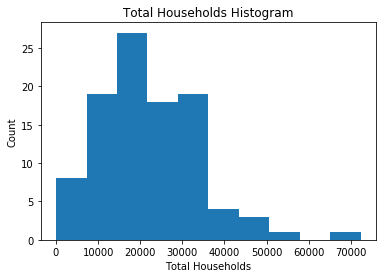

In [49]:
#Import matplotlib
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot

# Plot Count of Total Households
plt.pyplot.hist(df["Total Households"])

# set x/y labels and plot title
plt.pyplot.xlabel("Total Households")
plt.pyplot.ylabel("Count")
plt.pyplot.title("Total Households Histogram")

Text(0.5, 1.0, 'Affluence Ratio Histogram')

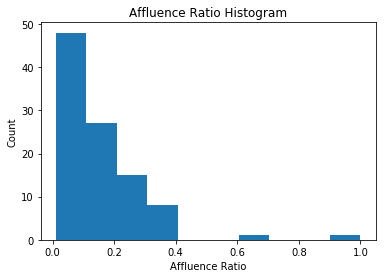

In [50]:
# Plot Count of Affluence Ratio
plt.pyplot.hist(df["Affluence Ratio"])

# set x/y labels and plot title
plt.pyplot.xlabel("Affluence Ratio")
plt.pyplot.ylabel("Count")
plt.pyplot.title("Affluence Ratio Histogram")

Text(0.5, 1.0, 'Population Histogram')

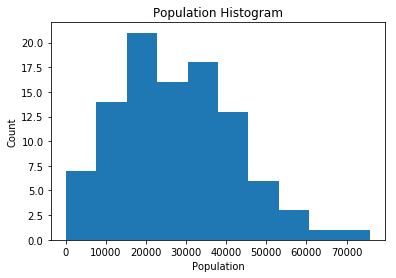

In [51]:
# Plot Count of Population
plt.pyplot.hist(df["Population"])

# set x/y labels and plot title
plt.pyplot.xlabel("Population")
plt.pyplot.ylabel("Count")
plt.pyplot.title("Population Histogram")

Text(0.5, 1.0, 'Household Size Histogram')

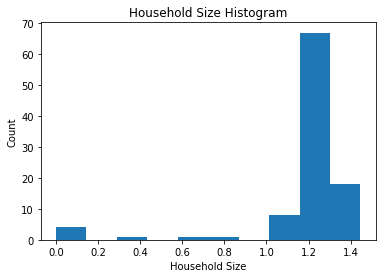

In [52]:
# Plot Count of Population
plt.pyplot.hist(df["Household Size"])

# set x/y labels and plot title
plt.pyplot.xlabel("Household Size")
plt.pyplot.ylabel("Count")
plt.pyplot.title("Household Size Histogram")

##### Commentary on histograms

In [53]:
# Import Seaborn
! pip install seaborn
import seaborn as sns
print('Seaborn installed!')

Seaborn installed!


Text(0.5, 1.0, 'Affluence Ratio by Total Households')

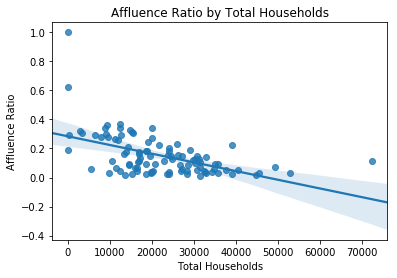

In [54]:
# Visualize the linear relationship between Total Households and Affluence Ratio
sns.regplot(x="Total Households", y="Affluence Ratio", data=df).set_title('Affluence Ratio by Total Households')

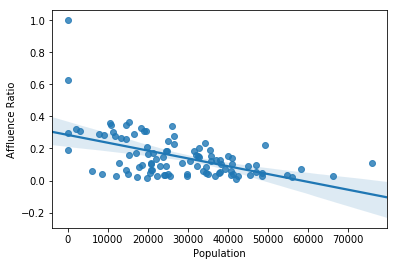

In [55]:
# Visualize the linear relationship between Population and Affluence Ratio
sns.regplot(x="Population", y="Affluence Ratio", data=df)

Text(0.5, 1.0, 'Affluence Ratio by Average Household Size')

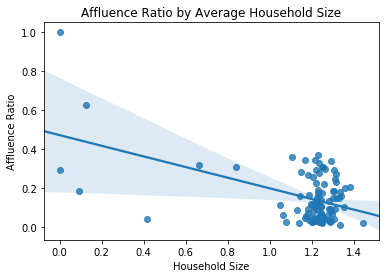

In [56]:
# Visualize the linear relationship between Total Households and Affluence Ratio
sns.regplot(x="Household Size", y="Affluence Ratio", data=df).set_title('Affluence Ratio by Average Household Size')

##### Commentary on linear plots

In [57]:
#Show number of FSAs per Place
PlaceFSAs = df['Place'].value_counts().to_frame()
PlaceFSAs.rename(columns={'Place': 'Number of FSAs'}, inplace=True)
PlaceFSAs.index.name = 'Place'
PlaceFSAs.head()

,Number of FSAs
Place,
North York,24
Downtown Toronto,18
Scarborough,17
Etobicoke,12
Central Toronto,9


In [58]:
# Group by Place
Places = df.groupby(['Place'],as_index=False).agg({'Total Households':'sum','Affluence Ratio':'max','Population':'sum','Latitude':'mean','Longitude':'mean','Household Size':'mean'})
Places

,Place,Total Households,Affluence Ratio,Population,Latitude,Longitude,Household Size
0,Central Toronto,132610,0.367576,164502,43.701933,-79.399644,1.235715
1,Downtown Toronto,235450,1.000000,271186,43.653889,-79.384544,0.866000
2,East Toronto,85860,0.245293,113956,43.671025,-79.326000,1.326708
3,East York,106250,0.310775,139996,43.700620,-79.333720,1.322320
4,Etobicoke,297640,0.343856,365318,43.660183,-79.540975,1.227804
5,North York,552550,0.339960,658944,43.750913,-79.429067,1.203730
6,Scarborough,513390,0.131442,634047,43.768000,-79.247941,1.236384
7,West Toronto,160930,0.232129,212782,43.651733,-79.447300,1.328814
8,York,134990,0.183890,171388,43.691080,-79.473600,1.271229


In [59]:
# Return top most affluent Places
Places.nlargest(10,['Affluence Ratio'])

,Place,Total Households,Affluence Ratio,Population,Latitude,Longitude,Household Size
1,Downtown Toronto,235450,1.000000,271186,43.653889,-79.384544,0.866000
0,Central Toronto,132610,0.367576,164502,43.701933,-79.399644,1.235715
4,Etobicoke,297640,0.343856,365318,43.660183,-79.540975,1.227804
5,North York,552550,0.339960,658944,43.750913,-79.429067,1.203730
3,East York,106250,0.310775,139996,43.700620,-79.333720,1.322320
2,East Toronto,85860,0.245293,113956,43.671025,-79.326000,1.326708
7,West Toronto,160930,0.232129,212782,43.651733,-79.447300,1.328814
8,York,134990,0.183890,171388,43.691080,-79.473600,1.271229
6,Scarborough,513390,0.131442,634047,43.768000,-79.247941,1.236384


#### Foursquare

In [60]:
# Import libraries for mapping & visualization

import requests # library to handle requests

from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 

# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

Solving environment: \ ^C
failed

CondaError: KeyboardInterrupt

Folium installed
Libraries imported.


In [61]:
# Defining Foursquare Credentials and Version
CLIENT_ID = 'X5G11PELMYJFLVGEDUN4KO5UEBVMY4BCS2D2XEIKL1M5EMVG' # your Foursquare ID
CLIENT_SECRET = 'VQRDOZV1H30VIZJMN1IE4OHJNGCL01JBUMJBARXJ3YGMWZAU' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 1000
print('Your credentials:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentials:
CLIENT_ID: X5G11PELMYJFLVGEDUN4KO5UEBVMY4BCS2D2XEIKL1M5EMVG
CLIENT_SECRET:VQRDOZV1H30VIZJMN1IE4OHJNGCL01JBUMJBARXJ3YGMWZAU


In [62]:
# Define an instance of the geocoder using Toronto as the address
address = 'Toronto, Ontario'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

43.6534817 -79.3839347


In [63]:
# Search for martial arts venues in Toronto
search_query = 'Martial Arts'
radius = 10000
print(search_query + ' .... OK!')

Martial Arts .... OK!


In [64]:
# Define the corresponding URL
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=X5G11PELMYJFLVGEDUN4KO5UEBVMY4BCS2D2XEIKL1M5EMVG&client_secret=VQRDOZV1H30VIZJMN1IE4OHJNGCL01JBUMJBARXJ3YGMWZAU&ll=43.6534817,-79.3839347&v=20180604&query=Martial Arts&radius=10000&limit=1000'

In [65]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5f39d2cbe70bb116fe8ba777'},
 'response': {'venues': [{'id': '56163504498ed1e1a310ca59',
    'name': 'Elite Martial Arts Toronto',
    'location': {'address': '1 York Street',
     'crossStreet': '5th Floor',
     'lat': 43.64986396690839,
     'lng': -79.36763763427734,
     'labeledLatLngs': [{'label': 'display',
       'lat': 43.64986396690839,
       'lng': -79.36763763427734}],
     'distance': 1373,
     'postalCode': 'M5J 0B6',
     'cc': 'CA',
     'city': 'Toronto',
     'state': 'ON',
     'country': 'Canada',
     'formattedAddress': ['1 York Street (5th Floor)',
      'Toronto ON M5J 0B6',
      'Canada']},
    'categories': [{'id': '4bf58dd8d48988d101941735',
      'name': 'Martial Arts School',
      'pluralName': 'Martial Arts Schools',
      'shortName': 'Martial Arts',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/gym_martialarts_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-15976

In [66]:
#assign relevant part of JSON to venues
studios = results['response']['venues']

#transform venues into a dataframe
location = json_normalize(studios)
location.head()

,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.crossStreet,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.neighborhood,location.postalCode,location.state,name,referralId,venuePage.id
0,"[{'id': '4bf58dd8d48988d101941735', 'name': 'M...",False,56163504498ed1e1a310ca59,1 York Street,CA,Toronto,Canada,5th Floor,1373,"[1 York Street (5th Floor), Toronto ON M5J 0B6...","[{'label': 'display', 'lat': 43.64986396690839...",43.649864,-79.367638,NaN,M5J 0B6,ON,Elite Martial Arts Toronto,v-1597625096,NaN
1,"[{'id': '4bf58dd8d48988d101941735', 'name': 'M...",False,5b5729c12463d80044eefe9c,403 Dundas Street W,CA,Toronto,Canada,NaN,914,"[403 Dundas Street W, Toronto ON M5T 1G6, Canada]","[{'label': 'display', 'lat': 43.65352802848363...",43.653528,-79.395286,NaN,M5T 1G6,ON,Innercity Martial Arts,v-1597625096,NaN
2,"[{'id': '4bf58dd8d48988d101941735', 'name': 'M...",False,513ce41490e7a7019e6b8e57,40 Wellesley Street East,CA,Toronto,Canada,Yonge St. and Wellesley St.,1332,[40 Wellesley Street East (Yonge St. and Welle...,"[{'label': 'display', 'lat': 43.66542692370103...",43.665427,-79.382894,NaN,M4Y 1G2,ON,Sunrise Martial Arts,v-1597625096,NaN
3,"[{'id': '4bf58dd8d48988d101941735', 'name': 'M...",False,4d9b85a6913a236a733fa108,593 Yonge St.,CA,Toronto,Canada,Wellesley St.,1414,"[593 Yonge St. (Wellesley St.), Toronto ON M4Y...","[{'label': 'display', 'lat': 43.66617160794109...",43.666172,-79.384767,NaN,M4Y 1Z4,ON,Openmat Mixed Martial Arts,v-1597625096,46003349
4,"[{'id': '4bf58dd8d48988d1f1931735', 'name': 'G...",False,50c825d8d86cee17055efb2e,1431 Yonge Street Upper Level,CA,Toronto,Canada,NaN,4001,"[1431 Yonge Street Upper Level, Toronto ON M4T...","[{'label': 'display', 'lat': 43.68930297757507...",43.689303,-79.388087,NaN,M4T 1Y7,ON,Classical Martial Arts Centre - Renge Dojo,v-1597625096,557501259


In [67]:
#keep only columns that include venue name, and anything associated with location
filtered_columns = ['name','categories'] + [col for col in location.columns if col.startswith('location.')] + ['id']
location_filtered = location.loc[:, filtered_columns]

#function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories.']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']
    
#filter the category for each row
location_filtered['categories'] = location_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
location_filtered.columns = [column.split('.')[-1] for column in location_filtered.columns]

#drop column labeledLatLngs
location_filtered.drop(['labeledLatLngs'], axis=1, inplace=True)

location_filtered

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,lat,lng,neighborhood,postalCode,state,id
0,Elite Martial Arts Toronto,Martial Arts School,1 York Street,CA,Toronto,Canada,5th Floor,1373,"[1 York Street (5th Floor), Toronto ON M5J 0B6...",43.649864,-79.367638,NaN,M5J 0B6,ON,56163504498ed1e1a310ca59
1,Innercity Martial Arts,Martial Arts School,403 Dundas Street W,CA,Toronto,Canada,NaN,914,"[403 Dundas Street W, Toronto ON M5T 1G6, Canada]",43.653528,-79.395286,NaN,M5T 1G6,ON,5b5729c12463d80044eefe9c
2,Sunrise Martial Arts,Martial Arts School,40 Wellesley Street East,CA,Toronto,Canada,Yonge St. and Wellesley St.,1332,[40 Wellesley Street East (Yonge St. and Welle...,43.665427,-79.382894,NaN,M4Y 1G2,ON,513ce41490e7a7019e6b8e57
3,Openmat Mixed Martial Arts,Martial Arts School,593 Yonge St.,CA,Toronto,Canada,Wellesley St.,1414,"[593 Yonge St. (Wellesley St.), Toronto ON M4Y...",43.666172,-79.384767,NaN,M4Y 1Z4,ON,4d9b85a6913a236a733fa108
4,Classical Martial Arts Centre - Renge Dojo,General Entertainment,1431 Yonge Street Upper Level,CA,Toronto,Canada,NaN,4001,"[1431 Yonge Street Upper Level, Toronto ON M4T...",43.689303,-79.388087,NaN,M4T 1Y7,ON,50c825d8d86cee17055efb2e
5,T.H.A Martial Arts & Kickboxing - Toronto Hapk...,Martial Arts School,1669 Bayview Avenue #200,CA,Toronto,Canada,NaN,6037,"[1669 Bayview Avenue #200, Toronto ON M4G 3C1...",43.707378,-79.375591,NaN,M4G 3C1,ON,4bd3521641b9ef3bd4e0ffe5
6,High Park Martial Arts Academy,Martial Arts School,3094 Dundas St W,CA,Toronto,Canada,Dundas W/High Park,7289,"[3094 Dundas St W (Dundas W/High Park), Toront...",43.665505,-79.472904,NaN,M6P 1Z8,ON,4b802403f964a520e05530e3
7,Martial Arts,Student Center,146 Danforth Ave.,CA,Toronto,Canada,Broadview,3308,"[146 Danforth Ave. (Broadview), Toronto ON, Ca...",43.676447,-79.357845,NaN,NaN,ON,4d7b9181f260a093d16729ba
8,Black Devil Mixed Martial Arts,Martial Arts School,570 Bloor Street,CA,Toronto,Canada,Bathurst,2595,"[570 Bloor Street (Bathurst), Toronto ON M5C 2...",43.665070,-79.411905,"Annex, Mirvish Village",M5C 2M7,ON,4c325b187cc0c9b6a02ff09a
9,Wu Xing Martial Arts,Martial Arts School,"374 Dupont St, 2nd Floor",CA,Toronto,Canada,at Brunswick Ave,3133,"[374 Dupont St, 2nd Floor (at Brunswick Ave), ...",43.674076,-79.410455,NaN,M5R 1V9,ON,4d9a06d177c18eece7497b92


In [68]:
# Drop rows at the end of the dataframe that are not martial arts studios

location_filtered = location_filtered.iloc[0:37,:]
location_filtered

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,lat,lng,neighborhood,postalCode,state,id
0,Elite Martial Arts Toronto,Martial Arts School,1 York Street,CA,Toronto,Canada,5th Floor,1373,"[1 York Street (5th Floor), Toronto ON M5J 0B6...",43.649864,-79.367638,NaN,M5J 0B6,ON,56163504498ed1e1a310ca59
1,Innercity Martial Arts,Martial Arts School,403 Dundas Street W,CA,Toronto,Canada,NaN,914,"[403 Dundas Street W, Toronto ON M5T 1G6, Canada]",43.653528,-79.395286,NaN,M5T 1G6,ON,5b5729c12463d80044eefe9c
2,Sunrise Martial Arts,Martial Arts School,40 Wellesley Street East,CA,Toronto,Canada,Yonge St. and Wellesley St.,1332,[40 Wellesley Street East (Yonge St. and Welle...,43.665427,-79.382894,NaN,M4Y 1G2,ON,513ce41490e7a7019e6b8e57
3,Openmat Mixed Martial Arts,Martial Arts School,593 Yonge St.,CA,Toronto,Canada,Wellesley St.,1414,"[593 Yonge St. (Wellesley St.), Toronto ON M4Y...",43.666172,-79.384767,NaN,M4Y 1Z4,ON,4d9b85a6913a236a733fa108
4,Classical Martial Arts Centre - Renge Dojo,General Entertainment,1431 Yonge Street Upper Level,CA,Toronto,Canada,NaN,4001,"[1431 Yonge Street Upper Level, Toronto ON M4T...",43.689303,-79.388087,NaN,M4T 1Y7,ON,50c825d8d86cee17055efb2e
5,T.H.A Martial Arts & Kickboxing - Toronto Hapk...,Martial Arts School,1669 Bayview Avenue #200,CA,Toronto,Canada,NaN,6037,"[1669 Bayview Avenue #200, Toronto ON M4G 3C1...",43.707378,-79.375591,NaN,M4G 3C1,ON,4bd3521641b9ef3bd4e0ffe5
6,High Park Martial Arts Academy,Martial Arts School,3094 Dundas St W,CA,Toronto,Canada,Dundas W/High Park,7289,"[3094 Dundas St W (Dundas W/High Park), Toront...",43.665505,-79.472904,NaN,M6P 1Z8,ON,4b802403f964a520e05530e3
7,Martial Arts,Student Center,146 Danforth Ave.,CA,Toronto,Canada,Broadview,3308,"[146 Danforth Ave. (Broadview), Toronto ON, Ca...",43.676447,-79.357845,NaN,NaN,ON,4d7b9181f260a093d16729ba
8,Black Devil Mixed Martial Arts,Martial Arts School,570 Bloor Street,CA,Toronto,Canada,Bathurst,2595,"[570 Bloor Street (Bathurst), Toronto ON M5C 2...",43.665070,-79.411905,"Annex, Mirvish Village",M5C 2M7,ON,4c325b187cc0c9b6a02ff09a
9,Wu Xing Martial Arts,Martial Arts School,"374 Dupont St, 2nd Floor",CA,Toronto,Canada,at Brunswick Ave,3133,"[374 Dupont St, 2nd Floor (at Brunswick Ave), ...",43.674076,-79.410455,NaN,M5R 1V9,ON,4d9a06d177c18eece7497b92


In [69]:
# Drop rows that do not contain a postal code
location_filtered = location_filtered.dropna(subset = ['postalCode']).reset_index(drop=True)
location_filtered


,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,lat,lng,neighborhood,postalCode,state,id
0,Elite Martial Arts Toronto,Martial Arts School,1 York Street,CA,Toronto,Canada,5th Floor,1373,"[1 York Street (5th Floor), Toronto ON M5J 0B6...",43.649864,-79.367638,NaN,M5J 0B6,ON,56163504498ed1e1a310ca59
1,Innercity Martial Arts,Martial Arts School,403 Dundas Street W,CA,Toronto,Canada,NaN,914,"[403 Dundas Street W, Toronto ON M5T 1G6, Canada]",43.653528,-79.395286,NaN,M5T 1G6,ON,5b5729c12463d80044eefe9c
2,Sunrise Martial Arts,Martial Arts School,40 Wellesley Street East,CA,Toronto,Canada,Yonge St. and Wellesley St.,1332,[40 Wellesley Street East (Yonge St. and Welle...,43.665427,-79.382894,NaN,M4Y 1G2,ON,513ce41490e7a7019e6b8e57
3,Openmat Mixed Martial Arts,Martial Arts School,593 Yonge St.,CA,Toronto,Canada,Wellesley St.,1414,"[593 Yonge St. (Wellesley St.), Toronto ON M4Y...",43.666172,-79.384767,NaN,M4Y 1Z4,ON,4d9b85a6913a236a733fa108
4,Classical Martial Arts Centre - Renge Dojo,General Entertainment,1431 Yonge Street Upper Level,CA,Toronto,Canada,NaN,4001,"[1431 Yonge Street Upper Level, Toronto ON M4T...",43.689303,-79.388087,NaN,M4T 1Y7,ON,50c825d8d86cee17055efb2e
5,T.H.A Martial Arts & Kickboxing - Toronto Hapk...,Martial Arts School,1669 Bayview Avenue #200,CA,Toronto,Canada,NaN,6037,"[1669 Bayview Avenue #200, Toronto ON M4G 3C1...",43.707378,-79.375591,NaN,M4G 3C1,ON,4bd3521641b9ef3bd4e0ffe5
6,High Park Martial Arts Academy,Martial Arts School,3094 Dundas St W,CA,Toronto,Canada,Dundas W/High Park,7289,"[3094 Dundas St W (Dundas W/High Park), Toront...",43.665505,-79.472904,NaN,M6P 1Z8,ON,4b802403f964a520e05530e3
7,Black Devil Mixed Martial Arts,Martial Arts School,570 Bloor Street,CA,Toronto,Canada,Bathurst,2595,"[570 Bloor Street (Bathurst), Toronto ON M5C 2...",43.665070,-79.411905,"Annex, Mirvish Village",M5C 2M7,ON,4c325b187cc0c9b6a02ff09a
8,Wu Xing Martial Arts,Martial Arts School,"374 Dupont St, 2nd Floor",CA,Toronto,Canada,at Brunswick Ave,3133,"[374 Dupont St, 2nd Floor (at Brunswick Ave), ...",43.674076,-79.410455,NaN,M5R 1V9,ON,4d9a06d177c18eece7497b92
9,Riverdale Martial Arts Centre,Martial Arts School,838 Broadview Av.,CA,Toronto,Canada,Pretoria,3481,"[838 Broadview Av. (Pretoria), Toronto ON M4K ...",43.678782,-79.358518,NaN,M4K 2R1,ON,517587dfc84c1ad085e157d6


In [70]:
# Create FSA column
location_filtered['FSA'] = location_filtered['postalCode'].str[:3]
location_filtered

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,lat,lng,neighborhood,postalCode,state,id,FSA
0,Elite Martial Arts Toronto,Martial Arts School,1 York Street,CA,Toronto,Canada,5th Floor,1373,"[1 York Street (5th Floor), Toronto ON M5J 0B6...",43.649864,-79.367638,NaN,M5J 0B6,ON,56163504498ed1e1a310ca59,M5J
1,Innercity Martial Arts,Martial Arts School,403 Dundas Street W,CA,Toronto,Canada,NaN,914,"[403 Dundas Street W, Toronto ON M5T 1G6, Canada]",43.653528,-79.395286,NaN,M5T 1G6,ON,5b5729c12463d80044eefe9c,M5T
2,Sunrise Martial Arts,Martial Arts School,40 Wellesley Street East,CA,Toronto,Canada,Yonge St. and Wellesley St.,1332,[40 Wellesley Street East (Yonge St. and Welle...,43.665427,-79.382894,NaN,M4Y 1G2,ON,513ce41490e7a7019e6b8e57,M4Y
3,Openmat Mixed Martial Arts,Martial Arts School,593 Yonge St.,CA,Toronto,Canada,Wellesley St.,1414,"[593 Yonge St. (Wellesley St.), Toronto ON M4Y...",43.666172,-79.384767,NaN,M4Y 1Z4,ON,4d9b85a6913a236a733fa108,M4Y
4,Classical Martial Arts Centre - Renge Dojo,General Entertainment,1431 Yonge Street Upper Level,CA,Toronto,Canada,NaN,4001,"[1431 Yonge Street Upper Level, Toronto ON M4T...",43.689303,-79.388087,NaN,M4T 1Y7,ON,50c825d8d86cee17055efb2e,M4T
5,T.H.A Martial Arts & Kickboxing - Toronto Hapk...,Martial Arts School,1669 Bayview Avenue #200,CA,Toronto,Canada,NaN,6037,"[1669 Bayview Avenue #200, Toronto ON M4G 3C1...",43.707378,-79.375591,NaN,M4G 3C1,ON,4bd3521641b9ef3bd4e0ffe5,M4G
6,High Park Martial Arts Academy,Martial Arts School,3094 Dundas St W,CA,Toronto,Canada,Dundas W/High Park,7289,"[3094 Dundas St W (Dundas W/High Park), Toront...",43.665505,-79.472904,NaN,M6P 1Z8,ON,4b802403f964a520e05530e3,M6P
7,Black Devil Mixed Martial Arts,Martial Arts School,570 Bloor Street,CA,Toronto,Canada,Bathurst,2595,"[570 Bloor Street (Bathurst), Toronto ON M5C 2...",43.665070,-79.411905,"Annex, Mirvish Village",M5C 2M7,ON,4c325b187cc0c9b6a02ff09a,M5C
8,Wu Xing Martial Arts,Martial Arts School,"374 Dupont St, 2nd Floor",CA,Toronto,Canada,at Brunswick Ave,3133,"[374 Dupont St, 2nd Floor (at Brunswick Ave), ...",43.674076,-79.410455,NaN,M5R 1V9,ON,4d9a06d177c18eece7497b92,M5R
9,Riverdale Martial Arts Centre,Martial Arts School,838 Broadview Av.,CA,Toronto,Canada,Pretoria,3481,"[838 Broadview Av. (Pretoria), Toronto ON M4K ...",43.678782,-79.358518,NaN,M4K 2R1,ON,517587dfc84c1ad085e157d6,M4K


In [71]:
competitors = location_filtered.groupby('FSA').count()[['postalCode']]
competitors.columns = ['Competitors']    
competitors

,Competitors
FSA,
L1V,1
M1C,1
M1N,1
M3C,1
M4C,1
M4G,1
M4K,1
M4L,1
M4N,1


In [72]:
# Append competition count to df
newdf = pd.merge(df, competitors, how='left', on=['FSA'])
newdf['Competitors'] = newdf['Competitors'].fillna(0)
newdf
                                                  


,FSA,Total Households,Affluence Ratio,Population,Latitude,Longitude,Place,Household Size,Competitors
0,M1B,52930,0.028150,66108,43.8113,-79.1930,Scarborough,1.248970,0.0
1,M1C,29770,0.119583,35626,43.7878,-79.1564,Scarborough,1.196708,1.0
2,M1E,37580,0.054550,46943,43.7678,-79.1866,Scarborough,1.249148,0.0
3,M1G,24020,0.025396,29690,43.7712,-79.2144,Scarborough,1.236053,0.0
4,M1H,19940,0.037111,24383,43.7686,-79.2389,Scarborough,1.222818,0.0
5,M1J,28480,0.025281,36699,43.7464,-79.2323,Scarborough,1.288588,0.0
6,M1K,39080,0.026100,48434,43.7298,-79.2639,Scarborough,1.239355,0.0
7,M1L,26840,0.042474,35081,43.7122,-79.2843,Scarborough,1.307042,0.0
8,M1M,18680,0.091542,22913,43.7247,-79.2312,Scarborough,1.226606,0.0
9,M1N,17270,0.131442,22136,43.6952,-79.2646,Scarborough,1.281760,1.0


In [73]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=11) # generate map centred around Toronto

# add the Martial Arts studios as blue circle markers
for lat, lng, label in zip(location_filtered.lat, location_filtered.lng, location_filtered.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)

# display map
venues_map

### Methodology

In [74]:
# Import libraries

import matplotlib.pyplot as plt # plotting library
# backend for rendering plots within the browser
%matplotlib inline 

from sklearn.cluster import KMeans 
from sklearn.datasets.samples_generator import make_blobs

print('Libraries imported.')

Libraries imported.


In [75]:
newdf = newdf[['FSA','Place','Competitors','Population','Total Households','Household Size','Affluence Ratio', 'Latitude','Longitude']]
newdf

,FSA,Place,Competitors,Population,Total Households,Household Size,Affluence Ratio,Latitude,Longitude
0,M1B,Scarborough,0.0,66108,52930,1.248970,0.028150,43.8113,-79.1930
1,M1C,Scarborough,1.0,35626,29770,1.196708,0.119583,43.7878,-79.1564
2,M1E,Scarborough,0.0,46943,37580,1.249148,0.054550,43.7678,-79.1866
3,M1G,Scarborough,0.0,29690,24020,1.236053,0.025396,43.7712,-79.2144
4,M1H,Scarborough,0.0,24383,19940,1.222818,0.037111,43.7686,-79.2389
5,M1J,Scarborough,0.0,36699,28480,1.288588,0.025281,43.7464,-79.2323
6,M1K,Scarborough,0.0,48434,39080,1.239355,0.026100,43.7298,-79.2639
7,M1L,Scarborough,0.0,35081,26840,1.307042,0.042474,43.7122,-79.2843
8,M1M,Scarborough,0.0,22913,18680,1.226606,0.091542,43.7247,-79.2312
9,M1N,Scarborough,1.0,22136,17270,1.281760,0.131442,43.6952,-79.2646


In [76]:
# Using K-Means Clustering on data from the affluence & population dataframe df

from sklearn.preprocessing import StandardScaler

X = newdf.values[:,2::]
X = np.nan_to_num(X)
cluster_dataset = StandardScaler().fit_transform(X)
cluster_dataset

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[-4.53603919e-01,  2.62999132e+00,  2.54046843e+00,
         2.80060087e-01, -8.73659709e-01,  1.99392910e+00,
         2.11834422e+00],
       [ 1.51858703e+00,  5.63118705e-01,  6.26022248e-01,
         7.95160815e-02, -2.23665694e-01,  1.54722207e+00,
         2.50126638e+00],
       [-4.53603919e-01,  1.33048297e+00,  1.27161053e+00,
         2.80743677e-01, -6.85983877e-01,  1.16704587e+00,
         2.18530328e+00],
       [-4.53603919e-01,  1.60620318e-01,  1.50717173e-01,
         2.30493963e-01, -8.93244062e-01,  1.23167583e+00,
         1.89444984e+00],
       [-4.53603919e-01, -1.99227887e-01, -1.86542776e-01,
         1.79708417e-01, -8.09956711e-01,  1.18225292e+00,
         1.63812217e+00],
       [-4.53603919e-01,  6.35874900e-01,  5.19388588e-01,
         4.32085355e-01, -8.94058783e-01,  7.60257346e-01,
         1.70717370e+00],
       [-4.53603919e-01,  1.43158221e+00,  1.39560316e+00,
         2.43164147e-01, -8.88233645e-01,  4.44711104e-01,
         1.3765633

In [77]:
num_clusters = 10

k_means = KMeans(init="k-means++", n_clusters=num_clusters, n_init=12)
k_means.fit(cluster_dataset)
clusters = k_means.labels_

print(clusters)

[8 0 0 0 0 0 0 0 0 3 0 0 0 0 8 8 0 0 8 0 9 5 8 9 5 0 9 6 5 7 7 7 7 5 9 9 6
 9 3 9 1 6 6 9 3 3 3 9 3 9 9 9 6 1 9 3 9 4 4 3 4 2 9 9 9 3 9 3 1 4 2 7 7 6
 5 1 6 1 1 7 5 1 6 9 1 1 1 9 1 1 1 1 1 7 7 7 7 1 5 5]


In [78]:
newdf["Cluster"] = clusters
newdf.head(5)

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,FSA,Place,Competitors,Population,Total Households,Household Size,Affluence Ratio,Latitude,Longitude,Cluster
0,M1B,Scarborough,0.0,66108,52930,1.248970,0.028150,43.8113,-79.1930,8
1,M1C,Scarborough,1.0,35626,29770,1.196708,0.119583,43.7878,-79.1564,0
2,M1E,Scarborough,0.0,46943,37580,1.249148,0.054550,43.7678,-79.1866,0
3,M1G,Scarborough,0.0,29690,24020,1.236053,0.025396,43.7712,-79.2144,0
4,M1H,Scarborough,0.0,24383,19940,1.222818,0.037111,43.7686,-79.2389,0


In [79]:
compcluster = newdf.groupby('Cluster').mean()
compcluster

,Competitors,Population,Total Households,Household Size,Affluence Ratio,Latitude,Longitude
Cluster,,,,,,,
0,0.0625,32851.000000,26516.250000,1.236614,0.059399,43.766619,-79.263931
1,0.0000,34018.375000,26859.375000,1.265920,0.142959,43.648850,-79.475450
2,0.0000,5.000000,60.000000,0.062500,0.812500,43.649200,-79.382300
3,1.0000,16017.800000,13061.000000,1.190135,0.255993,43.685740,-79.377350
4,0.0000,2610.750000,5937.500000,0.293505,0.211577,43.649150,-79.382575
5,0.0000,41149.875000,33430.000000,1.229636,0.053093,43.740037,-79.492300
6,1.5000,36286.875000,28105.000000,1.292184,0.138048,43.682175,-79.378575
7,0.0000,20291.090909,16841.818182,1.198226,0.050919,43.728718,-79.499709
8,0.0000,60689.800000,52108.000000,1.175911,0.058679,43.795600,-79.311100


In [86]:
compcluster['Recommend Ratio'] = (compcluster['Total Households']*compcluster['Affluence Ratio'])/(compcluster['Competitors']+1)
compcluster

,Competitors,Population,Total Households,Household Size,Affluence Ratio,Latitude,Longitude,Recommend Ratio
Cluster,,,,,,,,
0,0.0625,32851.000000,26516.250000,1.236614,0.059399,43.766619,-79.263931,1482.400461
1,0.0000,34018.375000,26859.375000,1.265920,0.142959,43.648850,-79.475450,3839.799971
2,0.0000,5.000000,60.000000,0.062500,0.812500,43.649200,-79.382300,48.750000
3,1.0000,16017.800000,13061.000000,1.190135,0.255993,43.685740,-79.377350,1671.760807
4,0.0000,2610.750000,5937.500000,0.293505,0.211577,43.649150,-79.382575,1256.240594
5,0.0000,41149.875000,33430.000000,1.229636,0.053093,43.740037,-79.492300,1774.907720
6,1.5000,36286.875000,28105.000000,1.292184,0.138048,43.682175,-79.378575,1551.935313
7,0.0000,20291.090909,16841.818182,1.198226,0.050919,43.728718,-79.499709,857.566189
8,0.0000,60689.800000,52108.000000,1.175911,0.058679,43.795600,-79.311100,3057.645666


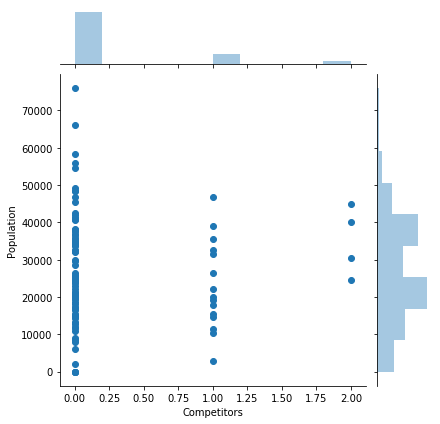

In [80]:
sns.jointplot(x="Competitors", y="Population", data=newdf)

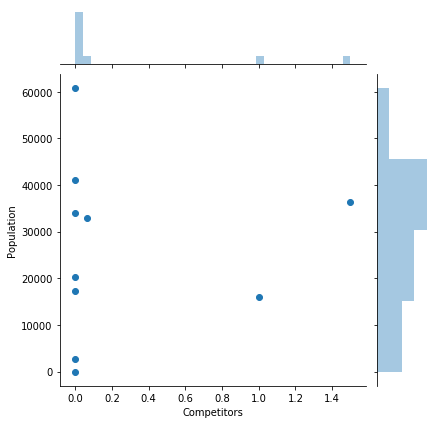

In [81]:
sns.jointplot(x="Competitors", y="Population", data=compcluster)

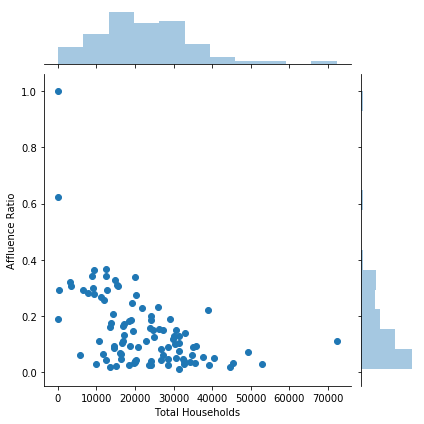

In [82]:
sns.jointplot(x="Total Households", y="Affluence Ratio", data=newdf)


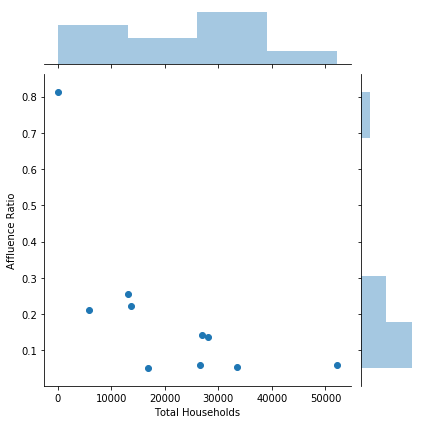

In [83]:
sns.jointplot(x="Total Households", y="Affluence Ratio", data=compcluster)


In [84]:
# Segmenting and Clustering into Boroughs & FSAs

# add markers to the Toronto map
for lat, lng, borough, FSA, HouseholdSize, AffluenceRatio, TotalHouseholds, Population in zip(df['Latitude'], df['Longitude'], df['Place'], df['FSA'], df['Household Size'], df['Affluence Ratio'], df['Total Households'], df['Population']):
    label = '{}, {}, {}, {}, {}, {}, {}, {}'.format(lat, lng, borough, FSA, HouseholdSize, AffluenceRatio, TotalHouseholds, Population)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='purple',
        fill=True,
        fill_color='purple',
        fill_opacity=0.7,
        parse_html=False).add_to(venues_map)
    

venues_map

In [85]:
# Adding k-means clusters to the map

for lat, lng, cluster in zip(compcluster['Latitude'], compcluster['Longitude'], compcluster.index):
    label = '{}, {}, {}'.format(lat, lng, cluster)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='yellow',
        fill=True,
        fill_color='yellow',
        fill_opacity=0.7,
        parse_html=False).add_to(venues_map)
    

venues_map

### Results

In [98]:
compcluster = compcluster.sort_values(by='Recommend Ratio', ascending=False)
compcluster

,Competitors,Population,Total Households,Household Size,Affluence Ratio,Latitude,Longitude,Recommend Ratio
Cluster,,,,,,,,
1,0.0000,34018.375000,26859.375000,1.265920,0.142959,43.648850,-79.475450,3839.799971
8,0.0000,60689.800000,52108.000000,1.175911,0.058679,43.795600,-79.311100,3057.645666
9,0.0000,17271.650000,13655.000000,1.256155,0.222649,43.693450,-79.381475,3040.277278
5,0.0000,41149.875000,33430.000000,1.229636,0.053093,43.740037,-79.492300,1774.907720
3,1.0000,16017.800000,13061.000000,1.190135,0.255993,43.685740,-79.377350,1671.760807
6,1.5000,36286.875000,28105.000000,1.292184,0.138048,43.682175,-79.378575,1551.935313
0,0.0625,32851.000000,26516.250000,1.236614,0.059399,43.766619,-79.263931,1482.400461
4,0.0000,2610.750000,5937.500000,0.293505,0.211577,43.649150,-79.382575,1256.240594
7,0.0000,20291.090909,16841.818182,1.198226,0.050919,43.728718,-79.499709,857.566189


In [100]:
recos = compcluster.iloc[0:3,::]
recos

,Competitors,Population,Total Households,Household Size,Affluence Ratio,Latitude,Longitude,Recommend Ratio
Cluster,,,,,,,,
1,0.0,34018.375,26859.375,1.265920,0.142959,43.64885,-79.475450,3839.799971
8,0.0,60689.800,52108.000,1.175911,0.058679,43.79560,-79.311100,3057.645666
9,0.0,17271.650,13655.000,1.256155,0.222649,43.69345,-79.381475,3040.277278


In [101]:
# Adding top 3 recommendations to the map

for lat, lng, cluster in zip(recos['Latitude'], recos['Longitude'], recos.index):
    label = '{}, {}, {}'.format(lat, lng, cluster)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=20,
        popup=label,
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity=0.7,
        parse_html=False).add_to(venues_map)
    

venues_map

### Discussion

#### The analysis of Toronto's martial arts industry has shown that Downtown and Central Toronto are heavy in competition compared with East York, Scarborough, and Etobicoke. The most affluent FSAs within the less competitive neighbourhoods are in the regions of Downtown Toronto, however this area also showcases the smallest average Household Size ratio. 

#### The Recommend Ratio was created to maximize the Population & Affluence Ratio of a cluster compared to the level of competition present there. The top three clusters were selected as recommendations, so that the client may decide based on other factors, such as availability & pricing of commercial real estate.

#### Suggestions for future improvements of this analysis include:
#### - taking more location data features into account
#### - using membership data for competitive studios to show areas with less penetration, and therefore more opportunity
#### - using commercial real estate pricing to show areas with higher rental prices
#### - using a choropleth map to show competition, population, and affluence 
#### - using a clustermap to differentiate relative similarity between clusters
#### - collecting publicly available revenue data for competitive studios for predictive modeling.

### Conclusion

#### The recommendation made to the client for where to start her new business in Toronto are:
#### 1. Etobicoke
#### 2. Scarborough
#### 3. Central Toronto